# 均线策略SMA
本质是趋势交易

当短期均线 上穿 长期均线是买入；相反是卖出

本质：是让价格的反应变得迟钝，均线周期越长，价格的反应就越迟钝!

迟钝的好处是平抑了一些扰动，降低交易次数；缺点是：反应迟钝，往往会造成 
1. 当短期均线刚上穿长期均线时，股票已经上涨了很多（有可能上涨趋势已经结束),
1. 当短期均线下穿长期均线时，股价已经下跌很多(损失了很多利润)

为了避免情况1，短期均线不能太长，这样可以对短期股票走势会灵敏一些，上涨时可以很快的上穿长期均线，下跌时也可以快速下穿

长期均线不能太短，应该在股票的整个上涨走势中保持平稳缓慢上升，否则交易频率会上升。那么怎么避免卖出时，收益出现大幅回撤呢？

有什么业务含义做解释或者支持？

股价有时候会受到意外情况，而剧烈波动，使用短期均线会平抑这种扰动。但是好像找不到其它的解释了呢。。。

所以，不能使用。。。

In [1]:
import tushare as ts

import pandas as pd

In [ ]:
TS_TOKEN = '5fd1639100f8a22b7f86e882e03192009faa72bae1ae93803e1172d5'
ts.set_token(TS_TOKEN)

In [66]:
def t(ts_code, start_date='20180101', end_date='20191017'):
    df = ts.pro_bar(ts_code=ts_code, adj='qfq', start_date=start_date, end_date=end_date)
    df.trade_date = pd.to_datetime(df.trade_date)
    df.set_index('trade_date', inplace=True)

    df.sort_index(inplace=True)

    df['amount_8_sum'] = df.amount.rolling(8).sum()

    df['vol_8_sum'] = df.vol.rolling(8).sum()

    df['amount_60_sum'] = df.amount.rolling(60).sum()
    df['vol_60_sum'] = df.vol.rolling(60).sum()
    df['price_8_mean'] = (df.amount_8_sum/df.vol_8_sum * 10).shift(1)

    df['price_60_mean'] = (df.amount_60_sum/df.vol_60_sum * 10).shift(1)
    
    df['amount_250_sum'] = df.amount.rolling(250).sum()
    df['vol_250_sum'] = df.vol.rolling(250).sum()
    df['price_250_mean'] = (df.amount_250_sum/df.vol_250_sum * 10).shift(1)

    df['close_8_mean'] = df.close.rolling(8).mean().shift(1)
    df['close_60_mean'] = df.close.rolling(60).mean().shift(1)
    df[['close', 'price_8_mean', 'price_60_mean', 'price_250_mean']].plot(figsize=(14, 8))

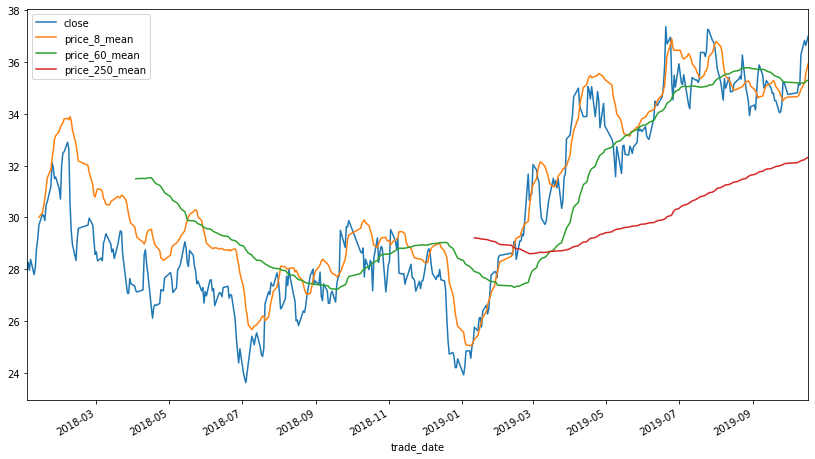

In [67]:
t('600036.SH')

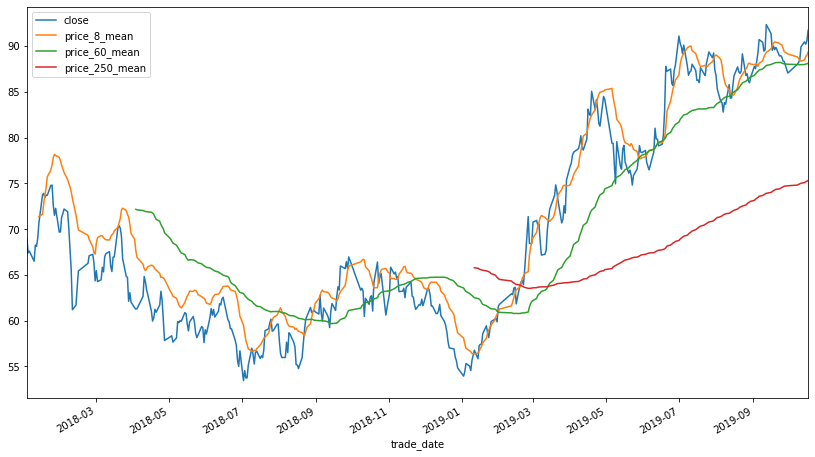

In [68]:
t('601318.SH')

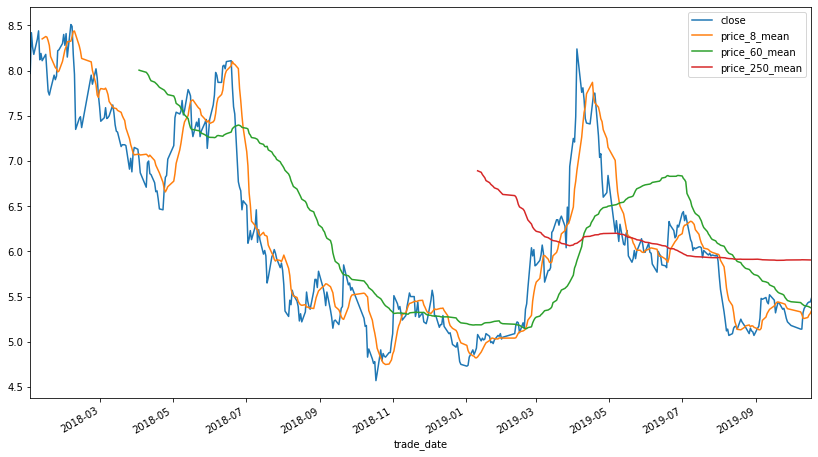

In [69]:
t('600115.SH')

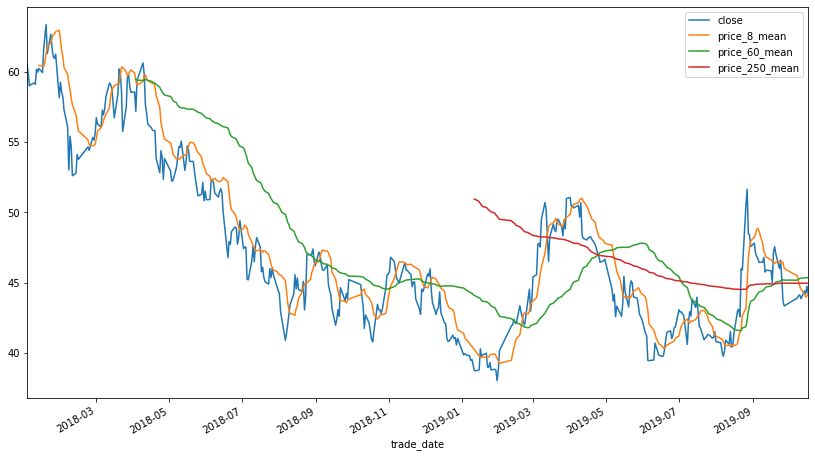

In [70]:
t('000028.SZ')

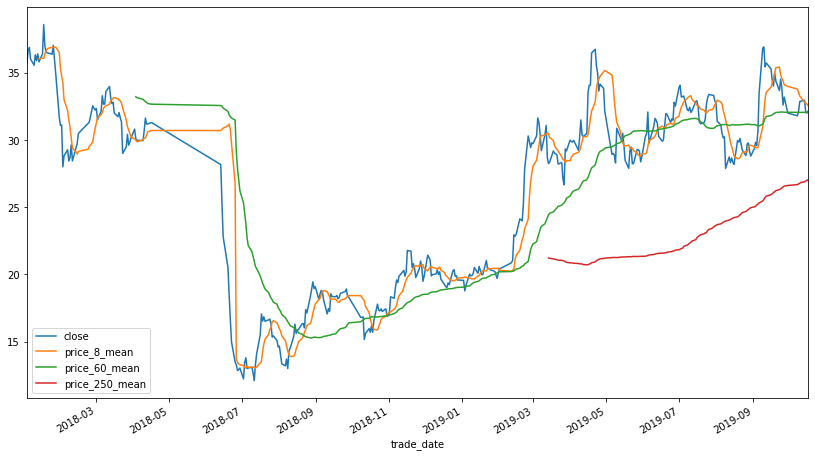

In [71]:
t('000063.SZ')

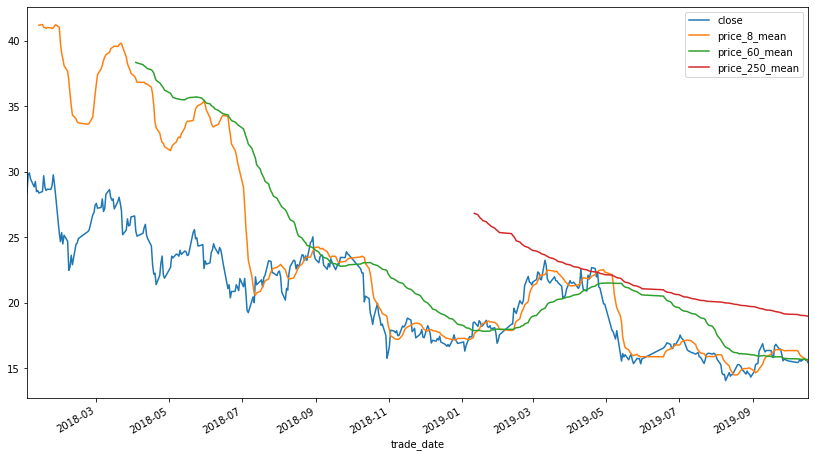

In [72]:
t('600487.SH')

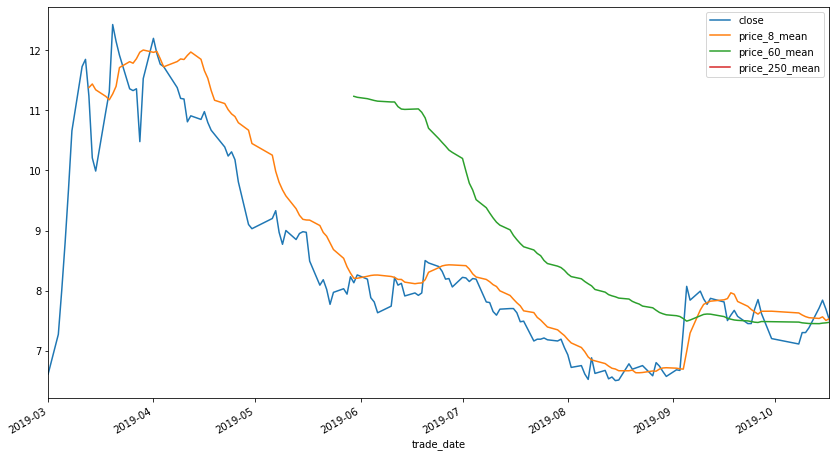

In [73]:
t('600928.SH')

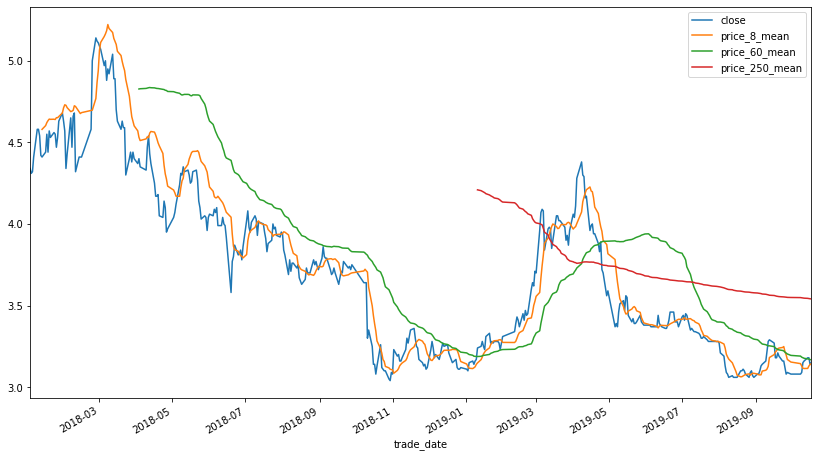

In [74]:
t('600567.SH')

In [4]:
df = ts.pro_bar(ts_code='600115.SH', adj='qfq', start_date='20180101', end_date='20191017')

In [7]:
df.trade_date = pd.to_datetime(df.trade_date)

In [8]:
df.set_index('trade_date', inplace=True)

In [9]:
df.sort_index(inplace=True)

In [15]:
df['amount_8_sum'] = df.amount.rolling(8).sum()

In [16]:
df['vol_8_sum'] = df.vol.rolling(8).sum()

In [26]:
df['amount_60_sum'] = df.amount.rolling(60).sum()

In [27]:
df['vol_60_sum'] = df.vol.rolling(60).sum()

In [35]:
df['price_8_mean'] = (df.amount_8_sum/df.vol_8_sum * 10).shift(1)

In [32]:
df['price_60_mean'] = (df.amount_60_sum/df.vol_60_sum * 10).shift(1)

In [38]:
df['close_8_mean'] = df.close.rolling(8).mean().shift(1)

In [19]:
# df.dropna(inplace=True)

In [33]:
df.head(10)

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount,vol_8_sum,price_mean,amount_8_sum,amount_60_sum,vol_60_sum,price_60_mean
trade_date,,,,,,,,,,,,,,,,
2018-01-02,600115.SH,8.11,8.18,7.81,7.97,8.14,-0.17,-2.09,1163625.18,931576.025,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,600115.SH,7.98,8.61,7.89,8.42,7.97,0.45,5.65,2084122.37,1741850.882,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,600115.SH,8.30,8.36,8.17,8.26,8.42,-0.16,-1.90,1400829.73,1165270.486,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,600115.SH,8.25,8.57,8.12,8.18,8.26,-0.08,-0.97,1386922.72,1162963.431,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,600115.SH,8.68,8.77,8.22,8.35,8.18,0.17,2.08,2179452.54,1867383.975,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-09,600115.SH,8.32,8.64,8.24,8.44,8.35,0.09,1.08,1437427.87,1228467.017,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-10,600115.SH,8.25,8.25,8.06,8.12,8.44,-0.32,-3.79,1382153.06,1137064.831,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-11,600115.SH,8.14,8.21,7.96,8.19,8.12,0.07,0.86,937337.35,763060.713,11971870.82,NaN,9997637.360,NaN,NaN,NaN
2018-01-12,600115.SH,8.15,8.31,8.05,8.11,8.19,-0.08,-0.98,869709.17,717042.083,11677954.81,8.350940,9783103.418,NaN,NaN,NaN


In [22]:
%matplotlib inline

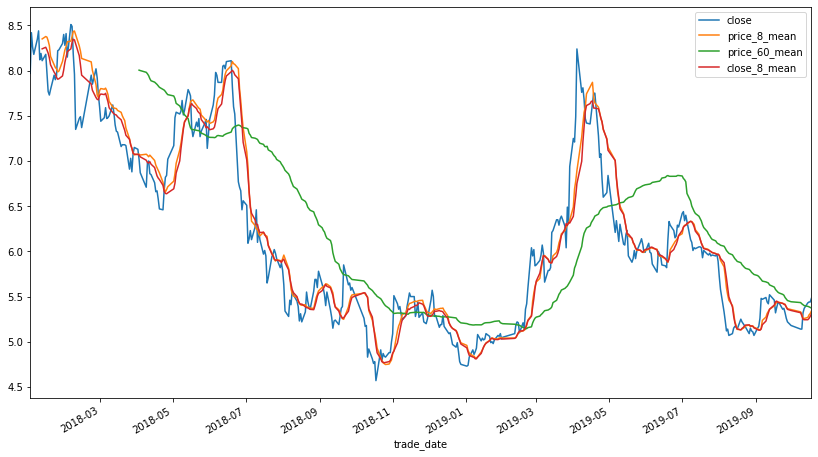

In [39]:
df[['close', 'price_8_mean', 'price_60_mean','close_8_mean']].plot(figsize=(14, 8))

In [1]:
import sys
sys.path.append('/Users/luoyonggui/PycharmProjects/mayifactories/finance/strategy')
from sma import SMA
%matplotlib inline

In [2]:
SMA.stocks_select(SMA.get_stocks_dict_top_n(800, '20191010'))

2019-10-24 08:58:49.383156
股票池容量：800
0, 工商银行
                 net   slow_ma
trade_date                    
2019-10-17  1.008833       NaN
2019-10-18  1.001766       NaN
2019-10-21  1.022968       NaN
2019-10-22  1.026501       NaN
2019-10-23  1.037102  0.979328
1, 建设银行
                 net   slow_ma
trade_date                    
2019-10-17  0.995887       NaN
2019-10-18  0.994516       NaN
2019-10-21  1.009604       NaN
2019-10-22  1.010976       NaN
2019-10-23  1.012348  0.977139
2, 中国平安
                 net   slow_ma
trade_date                    
2019-10-17  1.057216       NaN
2019-10-18  1.034509       NaN
2019-10-21  1.038197       NaN
2019-10-22  1.040733       NaN
2019-10-23  1.031627  1.014636
3, 贵州茅台
                 net  slow_ma
trade_date                   
2019-10-17  1.240413      NaN
2019-10-18  1.232509      NaN
2019-10-21  1.224868      NaN
2019-10-22  1.227278      NaN
2019-10-23  1.214815  1.14398
4, 农业银行
                 net   slow_ma
trade_date                    


                 net   slow_ma
trade_date                    
2019-10-17  1.058120       NaN
2019-10-18  1.041026       NaN
2019-10-21  1.052991       NaN
2019-10-22  1.039316       NaN
2019-10-23  1.011965  1.022878
38, 保利地产
                 net   slow_ma
trade_date                    
2019-10-17  1.096501       NaN
2019-10-18  1.071326       NaN
2019-10-21  1.103494       NaN
2019-10-22  1.097201       NaN
2019-10-23  1.071327  1.007551
39, 中国国旅
                 net   slow_ma
trade_date                    
2019-10-17  1.117494       NaN
2019-10-18  1.105884       NaN
2019-10-21  1.100079       NaN
2019-10-22  1.095087       NaN
2019-10-23  1.068963  1.070505
40, 中信建投
                 net   slow_ma
trade_date                    
2019-10-17  1.201590       NaN
2019-10-18  1.165930       NaN
2019-10-21  1.146291       NaN
2019-10-22  1.160245       NaN
2019-10-23  1.145257  1.092975
41, 顺丰控股
                 net   slow_ma
trade_date                    
2019-10-17  1.211091       NaN
201

                 net   slow_ma
trade_date                    
2019-10-16  1.274066       NaN
2019-10-17  1.277421       NaN
2019-10-18  1.269369       NaN
2019-10-21  1.244210       NaN
2019-10-22  1.280775  1.124822
75, 大秦铁路
                 net   slow_ma
trade_date                    
2019-10-17  0.984652       NaN
2019-10-18  0.984652       NaN
2019-10-21  0.969307       NaN
2019-10-22  0.976980       NaN
2019-10-23  0.983375  0.984888
76, 招商证券
                 net   slow_ma
trade_date                    
2019-10-17  1.046427       NaN
2019-10-18  1.009381       NaN
2019-10-21  1.023350       NaN
2019-10-22  1.016669       NaN
2019-10-23  1.011204  1.006862
77, 中油资本
                 net   slow_ma
trade_date                    
2019-10-17  1.083193       NaN
2019-10-18  1.042026       NaN
2019-10-21  1.041169       NaN
2019-10-22  1.059179       NaN
2019-10-23  1.044599  1.049859
78, 中国银河
                 net  slow_ma
trade_date                   
2019-10-17  0.948516      NaN
2019-1

                 net   slow_ma
trade_date                    
2019-10-17  0.905816       NaN
2019-10-18  0.889195       NaN
2019-10-21  0.891965       NaN
2019-10-22  0.889195       NaN
2019-10-23  0.897505  0.979409
112, 上海电气
                 net   slow_ma
trade_date                    
2019-10-17  0.955127       NaN
2019-10-18  0.941782       NaN
2019-10-21  0.939876       NaN
2019-10-22  0.945595       NaN
2019-10-23  0.939876  0.975481
113, 分众传媒
                 net   slow_ma
trade_date                    
2019-10-17  1.177085       NaN
2019-10-18  1.170834       NaN
2019-10-21  1.172917       NaN
2019-10-22  1.166667       NaN
2019-10-23  1.143750  1.095556
114, 科大讯飞
                 net   slow_ma
trade_date                    
2019-10-17  1.076455       NaN
2019-10-18  1.063305       NaN
2019-10-21  1.063305       NaN
2019-10-22  1.067906       NaN
2019-10-23  1.039690  1.012819
115, 南京银行
                 net   slow_ma
trade_date                    
2019-10-17  1.126582       NaN

                 net   slow_ma
trade_date                    
2019-10-17  0.998793       NaN
2019-10-18  0.982824       NaN
2019-10-21  0.991535       NaN
2019-10-22  0.992987       NaN
2019-10-23  0.984276  0.997165
149, 金风科技
                 net   slow_ma
trade_date                    
2019-10-17  1.050605       NaN
2019-10-18  1.011022       NaN
2019-10-21  1.002775       NaN
2019-10-22  1.020917       NaN
2019-10-23  1.013495  1.036787
150, 红塔证券
                 net   slow_ma
trade_date                    
2019-10-17  1.118858       NaN
2019-10-18  1.082174       NaN
2019-10-21  1.024947       NaN
2019-10-22  1.034485       NaN
2019-10-23  1.024947  1.152667
151, 陆家嘴
                 net   slow_ma
trade_date                    
2019-10-17  0.935503       NaN
2019-10-18  0.918531       NaN
2019-10-21  0.932109       NaN
2019-10-22  0.925320       NaN
2019-10-23  0.928036  0.962434
152, 同花顺
                 net  slow_ma
trade_date                   
2019-10-17  1.088410      NaN
2019

                 net   slow_ma
trade_date                    
2019-10-17  0.928146       NaN
2019-10-18  0.914541       NaN
2019-10-21  0.916667       NaN
2019-10-22  0.930272       NaN
2019-10-23  0.931122  0.963386
186, 兆易创新
                 net   slow_ma
trade_date                    
2019-10-17  1.364919       NaN
2019-10-18  1.308229       NaN
2019-10-21  1.342817       NaN
2019-10-22  1.401885       NaN
2019-10-23  1.397425  1.246035
187, 国电电力
                 net   slow_ma
trade_date                    
2019-10-17  0.936760       NaN
2019-10-18  0.928855       NaN
2019-10-21  0.932807       NaN
2019-10-22  0.928855       NaN
2019-10-23  0.928855  0.971213
188, 闻泰科技
                 net  slow_ma
trade_date                   
2019-10-17  2.009945      NaN
2019-10-18  1.899201      NaN
2019-10-21  1.923503      NaN
2019-10-22  1.976526      NaN
2019-10-23  1.949185  1.57847
189, 欧派家居
                 net   slow_ma
trade_date                    
2019-10-17  1.102944       NaN
2019-1

                 net   slow_ma
trade_date                    
2019-10-17  0.925878       NaN
2019-10-18  0.919101       NaN
2019-10-21  0.915290       NaN
2019-10-22  0.914443       NaN
2019-10-23  0.897501  1.012544
223, 春秋航空
                 net   slow_ma
trade_date                    
2019-10-17  1.004339       NaN
2019-10-18  1.010046       NaN
2019-10-21  1.024883       NaN
2019-10-22  1.038350       NaN
2019-10-23  1.036067  0.993919
224, 大族激光
                 net   slow_ma
trade_date                    
2019-10-17  1.384703       NaN
2019-10-18  1.356752       NaN
2019-10-21  1.337259       NaN
2019-10-22  1.367049       NaN
2019-10-23  1.392058  1.208498
225, 美锦能源
                 net   slow_ma
trade_date                    
2019-10-17  0.986928       NaN
2019-10-18  0.957517       NaN
2019-10-21  0.950981       NaN
2019-10-22  0.958606       NaN
2019-10-23  0.938997  1.049001
226, 宋城演艺
                 net   slow_ma
trade_date                    
2019-10-17  1.142007       NaN

                 net   slow_ma
trade_date                    
2019-10-17  1.136072       NaN
2019-10-18  1.123217       NaN
2019-10-21  1.131252       NaN
2019-10-22  1.121610       NaN
2019-10-23  1.121610  1.113991
260, 康龙化成
                 net   slow_ma
trade_date                    
2019-10-17  1.563889       NaN
2019-10-18  1.589444       NaN
2019-10-21  1.444444       NaN
2019-10-22  1.452223       NaN
2019-10-23  1.390278  1.195087
261, 通策医疗
                 net   slow_ma
trade_date                    
2019-10-17  1.285039       NaN
2019-10-18  1.281603       NaN
2019-10-21  1.251038       NaN
2019-10-22  1.276271       NaN
2019-10-23  1.253880  1.147441
262, 三环集团
                 net   slow_ma
trade_date                    
2019-10-17  0.938797       NaN
2019-10-18  0.933739       NaN
2019-10-21  0.927669       NaN
2019-10-22  0.940820       NaN
2019-10-23  0.944360  1.014374
263, 森马服饰
                 net   slow_ma
trade_date                    
2019-10-17  1.140565       NaN

                 net   slow_ma
trade_date                    
2019-10-17  0.956836       NaN
2019-10-18  0.940049       NaN
2019-10-21  0.908874       NaN
2019-10-22  0.918466       NaN
2019-10-23  0.913670  0.937251
297, 纳思达
                 net   slow_ma
trade_date                    
2019-10-17  1.329837       NaN
2019-10-18  1.328087       NaN
2019-10-21  1.281718       NaN
2019-10-22  1.280406       NaN
2019-10-23  1.216539  1.155352
298, 西部证券
                 net   slow_ma
trade_date                    
2019-10-17  0.923944       NaN
2019-10-18  0.909555       NaN
2019-10-21  0.910583       NaN
2019-10-22  0.915721       NaN
2019-10-23  0.911611  0.945305
299, 天坛生物
                 net  slow_ma
trade_date                   
2019-10-17  1.151711      NaN
2019-10-18  1.143131      NaN
2019-10-21  1.102569      NaN
2019-10-22  1.099449      NaN
2019-10-23  1.073707  1.08142
300, 中金黄金
                 net   slow_ma
trade_date                    
2019-10-17  0.940963       NaN
2019-10

                 net   slow_ma
trade_date                    
2019-10-17  1.510376       NaN
2019-10-18  1.512682       NaN
2019-10-21  1.492698       NaN
2019-10-22  1.500000       NaN
2019-10-23  1.476173  1.296854
334, 凯莱英
                 net  slow_ma
trade_date                   
2019-10-17  1.338682      NaN
2019-10-18  1.325186      NaN
2019-10-21  1.303932      NaN
2019-10-22  1.342827      NaN
2019-10-23  1.307120  1.16188
335, 东方电气
                 net   slow_ma
trade_date                    
2019-10-17  0.925369       NaN
2019-10-18  0.910476       NaN
2019-10-21  0.915440       NaN
2019-10-22  0.918419       NaN
2019-10-23  0.904519  0.940166
336, 申能股份
                 net   slow_ma
trade_date                    
2019-10-17  1.031525       NaN
2019-10-18  1.029773       NaN
2019-10-21  1.035027       NaN
2019-10-22  1.036778       NaN
2019-10-23  1.042033  1.003882
337, 郑州银行
                 net   slow_ma
trade_date                    
2019-10-17  0.977734       NaN
2019-10

                 net   slow_ma
trade_date                    
2019-10-17  1.015549       NaN
2019-10-18  0.970448       NaN
2019-10-21  0.968893       NaN
2019-10-22  0.976669       NaN
2019-10-23  0.965783  1.032088
371, 阳光城
                 net   slow_ma
trade_date                    
2019-10-17  0.949785       NaN
2019-10-18  0.929699       NaN
2019-10-21  0.942612       NaN
2019-10-22  0.948350       NaN
2019-10-23  0.932569  0.898541
372, 东方通信
                 net  slow_ma
trade_date                   
2019-10-17  1.062949      NaN
2019-10-18  1.074302      NaN
2019-10-21  1.070690      NaN
2019-10-22  1.062950      NaN
2019-10-23  1.056241   1.0659
373, 伟星新材
                 net   slow_ma
trade_date                    
2019-10-17  1.005442       NaN
2019-10-18  1.009071       NaN
2019-10-21  1.028431       NaN
2019-10-22  1.007862       NaN
2019-10-23  1.012097  0.951873
374, 老板电器
                 net   slow_ma
trade_date                    
2019-10-17  1.145714       NaN
2019-10

                 net   slow_ma
trade_date                    
2019-10-17  0.980052       NaN
2019-10-18  0.960102       NaN
2019-10-21  0.957608       NaN
2019-10-22  0.960102       NaN
2019-10-23  0.960102  0.971613
408, 中天金融
                 net   slow_ma
trade_date                    
2019-10-17  0.905013       NaN
2019-10-18  0.889182       NaN
2019-10-21  0.881266       NaN
2019-10-22  0.889182       NaN
2019-10-23  0.883905  0.927792
409, 天士力
                 net   slow_ma
trade_date                    
2019-10-17  0.966026       NaN
2019-10-18  0.954291       NaN
2019-10-21  0.953674       NaN
2019-10-22  0.956762       NaN
2019-10-23  0.939467  1.012518
410, 太平洋
                 net   slow_ma
trade_date                    
2019-10-17  0.942149       NaN
2019-10-18  0.928375       NaN
2019-10-21  0.925620       NaN
2019-10-22  0.931130       NaN
2019-10-23  0.925620  0.979431
411, 金融街
                 net   slow_ma
trade_date                    
2019-10-17  1.036130       NaN
20

                 net   slow_ma
trade_date                    
2019-10-17  0.922534       NaN
2019-10-18  0.916498       NaN
2019-10-21  0.912474       NaN
2019-10-22  0.918510       NaN
2019-10-23  0.910462  0.947232
445, 山西证券
                 net   slow_ma
trade_date                    
2019-10-17  0.952327       NaN
2019-10-18  0.932064       NaN
2019-10-21  0.927297       NaN
2019-10-22  0.930872       NaN
2019-10-23  0.924913  0.949783
446, 欣旺达
                 net   slow_ma
trade_date                    
2019-10-17  1.275002       NaN
2019-10-18  1.209823       NaN
2019-10-21  1.194645       NaN
2019-10-22  1.183038       NaN
2019-10-23  1.162503  1.196817
447, 太钢不锈
                 net  slow_ma
trade_date                   
2019-10-17  0.944175      NaN
2019-10-18  0.929613      NaN
2019-10-21  0.924758      NaN
2019-10-22  0.932040      NaN
2019-10-23  0.927186  0.95085
448, 中南传媒
                 net   slow_ma
trade_date                    
2019-10-17  1.027386       NaN
2019-10

                 net   slow_ma
trade_date                    
2019-10-17  1.170586       NaN
2019-10-18  1.171762       NaN
2019-10-21  1.138821       NaN
2019-10-22  1.191763       NaN
2019-10-23  1.171175  1.133027
482, 粤电力A
                 net   slow_ma
trade_date                    
2019-10-17  1.012754       NaN
2019-10-18  0.999999       NaN
2019-10-21  0.999999       NaN
2019-10-22  0.999999       NaN
2019-10-23  1.002550  0.999532
483, 马钢股份
                 net   slow_ma
trade_date                    
2019-10-17  0.909091       NaN
2019-10-18  0.902358       NaN
2019-10-21  0.902358       NaN
2019-10-22  0.905724       NaN
2019-10-23  0.905724  0.925983
484, 光启技术
                 net   slow_ma
trade_date                    
2019-10-17  1.301722       NaN
2019-10-18  1.243533       NaN
2019-10-21  1.199351       NaN
2019-10-22  1.248921       NaN
2019-10-23  1.199352  1.013451
485, 外高桥
                 net   slow_ma
trade_date                    
2019-10-17  0.927199       NaN


                 net   slow_ma
trade_date                    
2019-10-17  1.362032       NaN
2019-10-18  1.302278       NaN
2019-10-21  1.267128       NaN
2019-10-22  1.272401       NaN
2019-10-23  1.239009  1.101461
519, ST康美
                 net   slow_ma
trade_date                    
2019-10-17  1.232365       NaN
2019-10-18  1.205509       NaN
2019-10-21  1.145831       NaN
2019-10-22  1.163734       NaN
2019-10-23  1.148814  1.069317
520, 中原证券
                 net   slow_ma
trade_date                    
2019-10-17  0.992095       NaN
2019-10-18  0.972333       NaN
2019-10-21  0.968380       NaN
2019-10-22  0.970357       NaN
2019-10-23  0.960475  0.991634
521, 东北证券
                 net   slow_ma
trade_date                    
2019-10-17  0.937360       NaN
2019-10-18  0.912751       NaN
2019-10-21  0.913869       NaN
2019-10-22  0.917225       NaN
2019-10-23  0.911632  0.947949
522, 吉比特
                 net   slow_ma
trade_date                    
2019-10-17  1.372909       NaN


                 net   slow_ma
trade_date                    
2019-10-17  0.982659       NaN
2019-10-18  0.968208       NaN
2019-10-21  0.971098       NaN
2019-10-22  0.979769       NaN
2019-10-23  0.971098  0.987525
556, 中国西电
                 net   slow_ma
trade_date                    
2019-10-17  0.991733       NaN
2019-10-18  0.972449       NaN
2019-10-21  0.972449       NaN
2019-10-22  0.969695       NaN
2019-10-23  0.964185  0.976583
557, 新华文轩
                 net   slow_ma
trade_date                    
2019-10-17  1.303956       NaN
2019-10-18  1.173561       NaN
2019-10-21  1.118705       NaN
2019-10-22  1.125899       NaN
2019-10-23  1.129497  1.138489
558, 睿创微纳
                 net   slow_ma
trade_date                    
2019-10-17  0.869904       NaN
2019-10-18  0.893371       NaN
2019-10-21  0.855321       NaN
2019-10-22  0.862841       NaN
2019-10-23  0.918207  1.135646
559, 涪陵榨菜
                 net   slow_ma
trade_date                    
2019-10-17  0.827408       NaN

                 net   slow_ma
trade_date                    
2019-10-17  1.269106       NaN
2019-10-18  1.239787       NaN
2019-10-21  1.170153       NaN
2019-10-22  1.193190       NaN
2019-10-23  1.204185  1.082345
593, 三美股份
                 net   slow_ma
trade_date                    
2019-10-17  0.958640       NaN
2019-10-18  0.972681       NaN
2019-10-21  0.967575       NaN
2019-10-22  0.980851       NaN
2019-10-23  0.970128  0.993382
594, 中国国贸
                 net   slow_ma
trade_date                    
2019-10-17  1.110077       NaN
2019-10-18  1.095854       NaN
2019-10-21  1.093381       NaN
2019-10-22  1.095854       NaN
2019-10-23  1.082249  1.025612
595, 营口港
                 net   slow_ma
trade_date                    
2019-10-17  0.990132       NaN
2019-10-18  0.979048       NaN
2019-10-21  0.982743       NaN
2019-10-22  0.990132       NaN
2019-10-23  0.990132  0.969699
596, 世茂股份
                 net  slow_ma
trade_date                   
2019-10-17  1.055828      NaN
201

                 net   slow_ma
trade_date                    
2019-10-17  0.962059       NaN
2019-10-18  0.963413       NaN
2019-10-21  0.967478       NaN
2019-10-22  0.982383       NaN
2019-10-23  0.964768  1.008242
630, 科瑞技术
                 net  slow_ma
trade_date                   
2019-10-17  2.402650      NaN
2019-10-18  2.397352      NaN
2019-10-21  2.268876      NaN
2019-10-22  2.314571      NaN
2019-10-23  2.313909      NaN
631, 百联股份
                 net   slow_ma
trade_date                    
2019-10-17  0.997482       NaN
2019-10-18  0.981845       NaN
2019-10-21  1.005302       NaN
2019-10-22  1.001951       NaN
2019-10-23  0.987430  0.997574
632, 太极实业
                 net   slow_ma
trade_date                    
2019-10-17  1.005501       NaN
2019-10-18  0.972488       NaN
2019-10-21  0.973863       NaN
2019-10-22  0.990369       NaN
2019-10-23  0.987618  1.021984
633, 航发控制
                 net   slow_ma
trade_date                    
2019-10-17  0.935862       NaN
2019-1

                 net   slow_ma
trade_date                    
2019-10-17  1.192661       NaN
2019-10-18  1.163303       NaN
2019-10-21  1.168808       NaN
2019-10-22  1.155964       NaN
2019-10-23  1.148625  1.055106
667, 天宜上佳
                 net   slow_ma
trade_date                    
2019-10-17  0.939979       NaN
2019-10-18  0.952508       NaN
2019-10-21  0.905887       NaN
2019-10-22  0.912589       NaN
2019-10-23  0.976109  1.225229
668, 大众公用
                 net  slow_ma
trade_date                   
2019-10-17  0.893959      NaN
2019-10-18  0.881832      NaN
2019-10-21  0.880099      NaN
2019-10-22  0.867971      NaN
2019-10-23  0.855844  0.89726
669, 贵州百灵
                 net   slow_ma
trade_date                    
2019-10-17  1.114825       NaN
2019-10-18  1.113710       NaN
2019-10-21  1.073576       NaN
2019-10-22  1.091414       NaN
2019-10-23  1.112596  1.040095
670, 珠江啤酒
                 net   slow_ma
trade_date                    
2019-10-17  1.160594       NaN
2019-1

                 net   slow_ma
trade_date                    
2019-10-17  1.067007       NaN
2019-10-18  1.054881       NaN
2019-10-21  1.072112       NaN
2019-10-22  1.065730       NaN
2019-10-23  1.000638  0.967123
704, 供销大集
                 net   slow_ma
trade_date                    
2019-10-17  0.987344       NaN
2019-10-18  0.966247       NaN
2019-10-21  0.953589       NaN
2019-10-22  0.970467       NaN
2019-10-23  0.966247  0.981295
705, 城投控股
                 net   slow_ma
trade_date                    
2019-10-17  0.884165       NaN
2019-10-18  0.873113       NaN
2019-10-21  0.873113       NaN
2019-10-22  0.873113       NaN
2019-10-23  0.871535  0.908844
706, 东方园林
                 net  slow_ma
trade_date                   
2019-10-17  0.894016      NaN
2019-10-18  0.901056      NaN
2019-10-21  0.894016      NaN
2019-10-22  0.899296      NaN
2019-10-23  0.890496  0.93574
707, 天虹股份
                 net   slow_ma
trade_date                    
2019-10-17  0.841461       NaN
2019-1

                 net  slow_ma
trade_date                   
2019-10-17  0.991619      NaN
2019-10-18  0.994134      NaN
2019-10-21  0.949708      NaN
2019-10-22  0.951385      NaN
2019-10-23  0.959767  1.01059
741, 一心堂
                 net   slow_ma
trade_date                    
2019-10-17  1.051740       NaN
2019-10-18  1.045379       NaN
2019-10-21  1.032232       NaN
2019-10-22  1.061071       NaN
2019-10-23  1.059374  1.038974
742, 洽洽食品
                 net   slow_ma
trade_date                    
2019-10-17  1.093963       NaN
2019-10-18  1.203396       NaN
2019-10-21  1.252830       NaN
2019-10-22  1.264151       NaN
2019-10-23  1.247170  0.988535
743, 浙江东方
                 net   slow_ma
trade_date                    
2019-10-17  0.931019       NaN
2019-10-18  0.904388       NaN
2019-10-21  0.888852       NaN
2019-10-22  0.896620       NaN
2019-10-23  0.886632  0.961406
744, 以岭药业
                 net   slow_ma
trade_date                    
2019-10-17  1.012713       NaN
2019-10

                 net   slow_ma
trade_date                    
2019-10-17  0.998430       NaN
2019-10-18  0.984279       NaN
2019-10-21  0.977990       NaN
2019-10-22  0.982706       NaN
2019-10-23  0.974845  0.975945
778, 高新兴
                 net   slow_ma
trade_date                    
2019-10-17  0.874457       NaN
2019-10-18  0.854256       NaN
2019-10-21  0.858585       NaN
2019-10-22  0.864357       NaN
2019-10-23  0.860028  1.019986
779, 四川长虹
                 net   slow_ma
trade_date                    
2019-10-17  0.918745       NaN
2019-10-18  0.908499       NaN
2019-10-21  0.898253       NaN
2019-10-22  0.905084       NaN
2019-10-23  0.894838  0.944428
780, 华胜天成
                 net  slow_ma
trade_date                   
2019-10-17  1.187309      NaN
2019-10-18  1.140227      NaN
2019-10-21  1.141251      NaN
2019-10-22  1.161721      NaN
2019-10-23  1.133062   1.1608
781, 冀中能源
                 net   slow_ma
trade_date                    
2019-10-17  0.962162       NaN
2019-10

['海天味业',
 '海康威视',
 '迈瑞医疗',
 '三一重工',
 '招商证券',
 '广发证券',
 '中煤能源',
 '华侨城A',
 '世纪华通',
 '上海医药',
 '川投能源',
 '金隅集团',
 '中环股份',
 '天茂集团',
 '浪潮信息',
 '西安银行',
 '东山精密',
 '东方雨虹',
 '长沙银行',
 '葛洲坝',
 '大连港',
 '深圳机场',
 '广深铁路',
 '国药股份',
 '粤电力A',
 '辽宁成大',
 '长信科技',
 '中顺洁柔',
 '招商南油',
 '深圳华强',
 '爱建集团',
 '南钢股份',
 '东华能源',
 '德邦股份',
 '天顺风能']

In [2]:
targets = ['中国人寿',
 '万科A',
 '海康威视',
 '招商蛇口',
 '申万宏源',
 '中国银河',
 '海尔智家',
 '东方航空',
 '南方航空',
 '新希望',
 '韵达股份',
 '荣盛石化',
 '国投电力',
 '中国中冶',
 '福耀玻璃',
 '石化油服',
 '中航资本',
 '上海莱士',
 '美锦能源',
 '巨人网络',
 '财通证券',
 '协鑫集成',
 '中科曙光',
 '深天马A',
 '江苏国信',
 '长飞光纤',
 '网宿科技',
 '中铁工业',
 '山西证券',
 '中南传媒',
 '广深铁路',
 '星宇股份',
 '张裕A',
 '首创股份',
 '厦门钨业',
 '宏发股份',
 '国药一致',
 '首钢股份',
 '中国西电',
 '锡业股份',
 '云南铜业',
 '重庆钢铁',
 '索菲亚',
 '粤高速A',
 '万丰奥威',
 '嘉化能源',
 '佳都科技',
 '迪普科技',
 '山东出版',
 '新钢股份',
 '北部湾港',
 '山鹰纸业',
 '昆仑万维',
 '中信国安',
 '晨鸣纸业',
 '南钢股份',
 '新潮能源',
 '梅花生物',
 '柳钢股份',
 '浙江东方',
 '宝新能源',
 '兆驰股份',
 '阳泉煤业',
 '蓝帆医疗',
 '太极股份',
 '滨江集团']

In [2]:
SMA.stocks_select(targets)

NameError: name 'targets' is not defined

# a

In [2]:
SMA.stock_select('华胜天成')

True

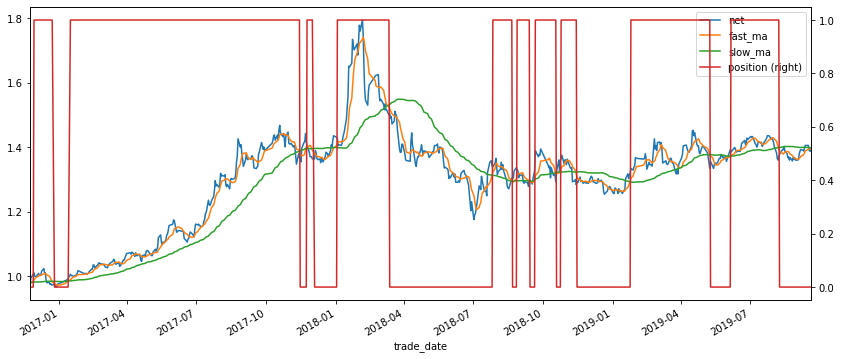

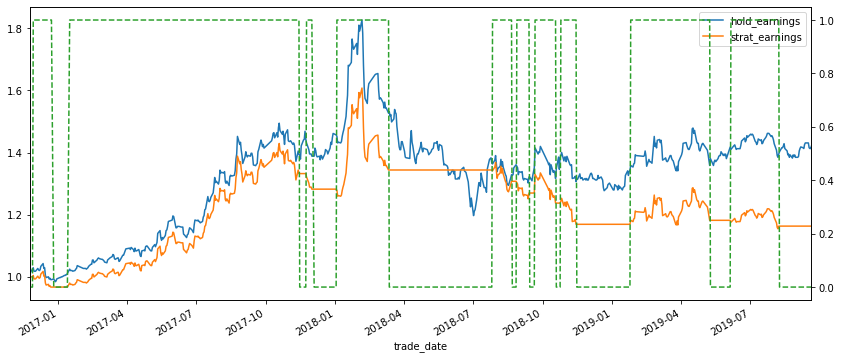

returns    1.420783
strat      1.163338
dtype: float64
returns    0.012678
strat      0.010208
dtype: float64
hold_max_drawdown: -0.3446326645042419
strat_max_drawdown: -0.28174801269825445


In [12]:
SMA.sma_base('工商银行', count=3*250)

In [4]:
SMA.stock_select('农业银行')

                 net
trade_date          
2019-06-28  0.994475
2019-07-01  1.000000
2019-07-02  1.005525
2019-07-03  1.011051
2019-07-04  1.011051
                 net
trade_date          
2019-09-16  0.972375
2019-09-17  0.964087
2019-09-18  0.961325
2019-09-19  0.961325
2019-09-20  0.964088
                 net   fast_ma   slow_ma
trade_date                              
2019-09-16  0.972375  0.965468       NaN
2019-09-17  0.964087  0.966850       NaN
2019-09-18  0.961325  0.966850       NaN
2019-09-19  0.961325  0.966504       NaN
2019-09-20  0.964088  0.966504  0.970764


True

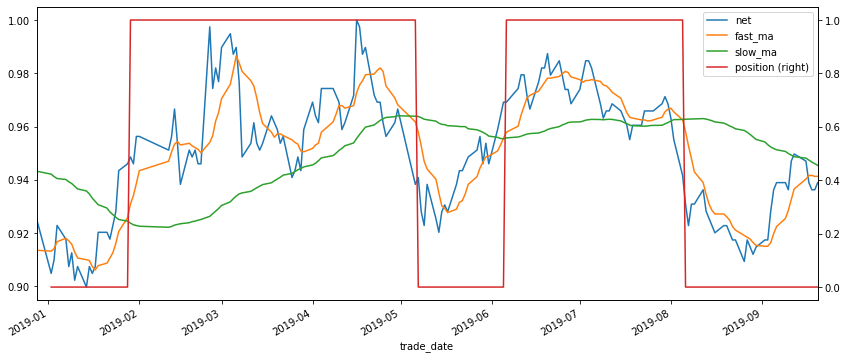

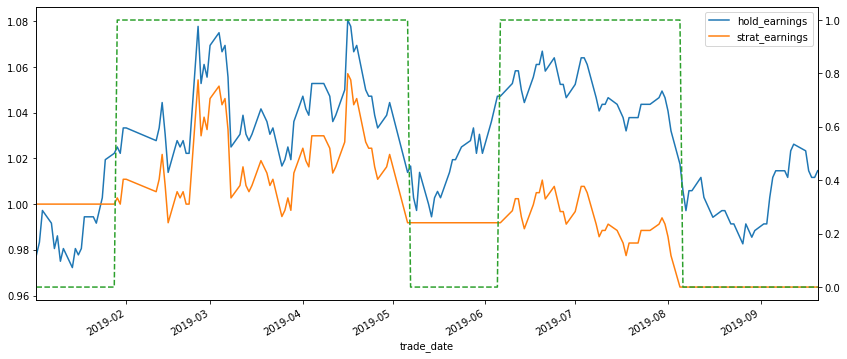

returns    1.014592
strat      0.963700
dtype: float64
returns    0.009298
strat      0.007841
dtype: float64
hold_max_drawdown: -0.09064076953719413
strat_max_drawdown: -0.0883253959812983


In [7]:
sma_base('农业银行', count=365, fast_ma=8, slow_ma=60)

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


returns    0.749975
strat      0.916800
dtype: float64
hold_max_drawdown: -0.4637832208594973
strat_max_drawdown: -0.2621351631716585


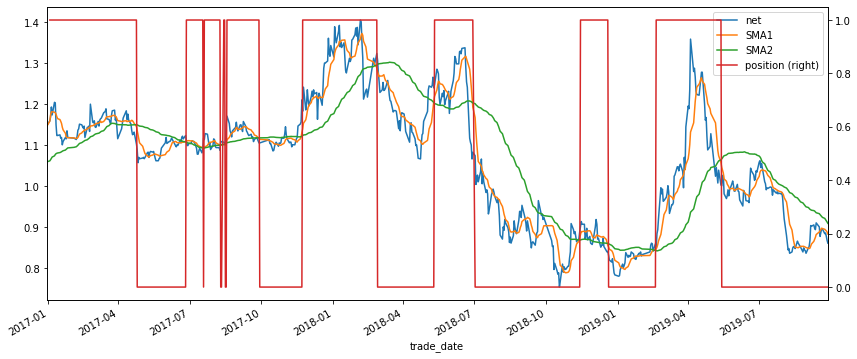

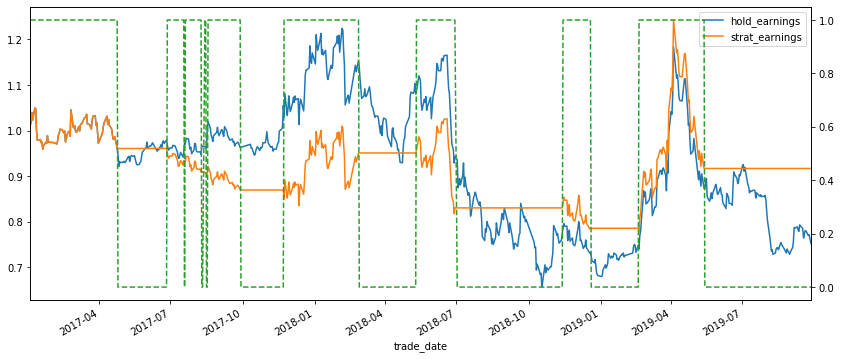

In [124]:
sma('600115.SH', 10, 60)

In [ ]:
可以看到，策略长时间收益不及长期持有的收益，原因：上涨时反应慢收益少，下跌时反应慢造成大幅回撤

如何改进？
1、买入时的假信号。这个有点难
2、卖出是减少回撤，这个好像有点办法。如计算短期均线回踩长期均线的次数，进行提前减仓或清仓

     pct_chg trade_date
724  -0.9404 2019-09-23
725   0.0000 2019-09-24
726  -1.2658 2019-09-25
727  -1.2821 2019-09-26
728   0.3247 2019-09-27


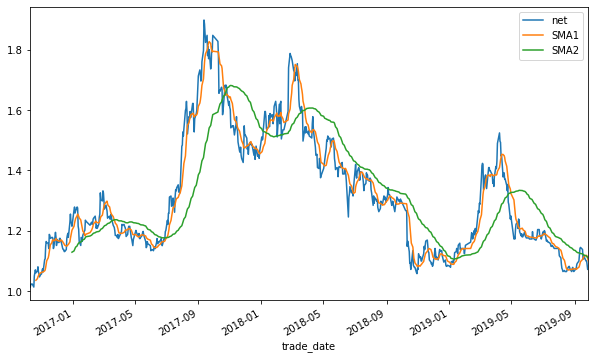

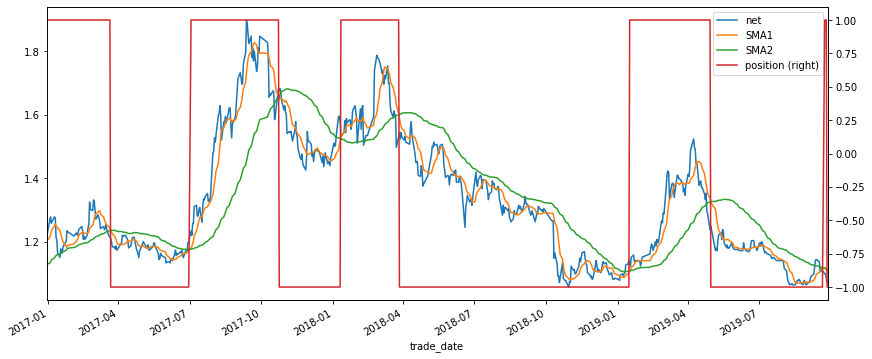

returns    0.885017
strat      2.418716
dtype: float64
returns    0.018985
strat      0.018940
dtype: float64


In [63]:
sma('600567.SH', 10, 60)

In [57]:
np.exp(data[['returns','strat']].sum())

returns     1.119147
strat      59.568000
dtype: float64

In [58]:
data[['returns','strat']].std()

returns    0.028735
strat      0.028718
dtype: float64

In [18]:
g = data[['returns','strat']]

In [20]:
g.var()**0.5

returns    0.015785
strat      0.015774
dtype: float64

In [21]:
data[['returns','strat']].var()*252**0.5

returns    0.003955
strat      0.003950
dtype: float64

In [24]:
data[['returns','strat']].std()*252**0.5

returns    0.250571
strat      0.250407
dtype: float64

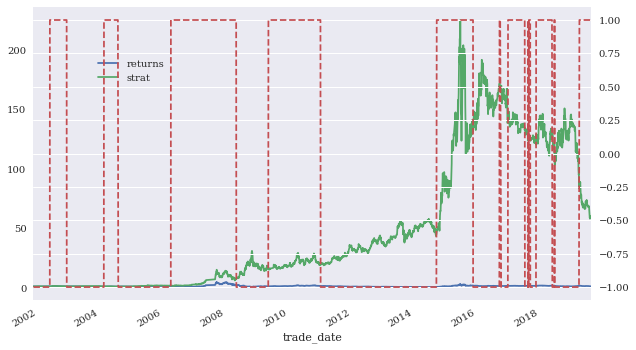

In [59]:
ax=data[['returns','strat']].cumsum().apply(np.exp).plot(figsize=(10,6))
data['position'].plot(ax=ax,secondary_y='position',style='--')
ax.get_legend().set_bbox_to_anchor((0.25,0.85))

In [37]:
from itertools import product
sma1=range(20,61,4)
sma2=range(180,281,10)
results=pd.DataFrame()
for SMA1,SMA2 in product(sma1,sma2):
    data=pd.DataFrame(df[symbol])
    data.dropna(inplace=True)
    data['returns']=np.log(data[symbol]/data[symbol].shift(1))
    data['SMA1']=data[symbol].rolling(SMA1).mean()
    data['SMA2']=data[symbol].rolling(SMA2).mean()
    data.dropna(inplace=True)
    data['position']=np.where(data['SMA1']>data['SMA2'],1,-1)
    data['strat']=data['position'].shift(1)*data['returns']
    data.dropna(inplace=True)
    pref=np.exp(data[['returns','strat']].sum())
    results=results.append(pd.DataFrame(
                {'SMA1':SMA1,'SMA2':SMA2,'MKT':pref['returns'],
                'strat':pref['strat'],
                'OUT':pref['strat']-pref['returns']},index=[0]),ignore_index=True)

In [38]:
results.sort_values('OUT',ascending=False).head()

,SMA1,SMA2,MKT,strat,OUT
113,60,210,1.088796,54.853838,53.765042
101,56,200,1.073628,50.129940,49.056312
112,60,200,1.073628,48.952989,47.879361
4,20,220,1.125262,37.589829,36.464567
99,56,180,0.970930,35.879995,34.909065


In [28]:
import math
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm

In [29]:
def print_stat(array):
    sta=scs.describe(array)
    print('%14s %15s'%('statistics','value'))
    print(30*'-')
    print('%14s %15.5f'%('size',round(sta[0])))
    print('%14s %15.5f'%('min',sta[1][0]))
    print('%14s %15.5f'%('max',sta[1][1]))
    print('%14s %15.5f'%('mean',sta[2]))
    print('%14s %15.5f'%('std',np.sqrt(sta[3])))
    print('%14s %15.5f'%('skew',sta[4]))
    print('%14s %15.5f'%('kurtosis',sta[5]))

In [31]:
print_stat(data.strat.values)

    statistics           value
------------------------------
          size      1858.00000
           min        -0.08330
           max         0.13187
          mean         0.00066
           std         0.01582
          skew         0.38438
      kurtosis         5.15146


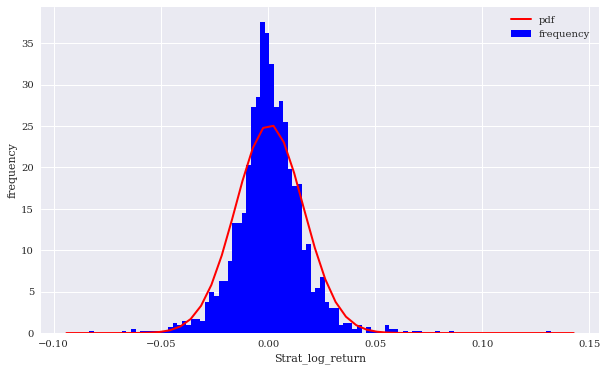

In [42]:
plt.figure(figsize=(10,6))
plt.hist(data.strat.values,bins=100,density=True,label='frequency',color='b')
plt.xlabel('Strat_log_return')
plt.ylabel('frequency')
x=np.linspace(plt.axis()[0],plt.axis()[1])
plt.plot(x,scs.norm.pdf(x,data.strat.mean(),data.strat.std()),
        'r',lw=2.0,label='pdf')
plt.legend()

In [ ]:
尖峰厚尾

Text(0, 0.5, 'sample quantiles')

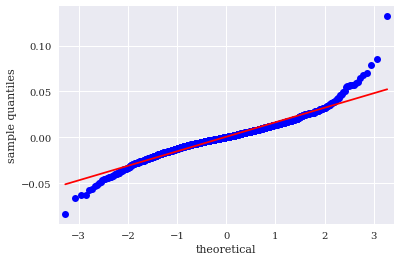

In [35]:
sm.qqplot(data.strat.values,line='s')
plt.xlabel('theoretical')
plt.ylabel('sample quantiles')

In [36]:
def normal_test(arr):
    print('Skew of dataset    %14.3f' % scs.skew(arr))
    print('Skew test Pvalue   %14.3f' % scs.skewtest(arr)[1])
    print('Kurt of dataset    %14.3f' % scs.kurtosis(arr))
    print('Kurt test Pvalue   %14.3f' % scs.kurtosistest(arr)[1])
    print('Normal test Pvalue %14.3f' % scs.normaltest(arr)[1])

In [37]:
normal_test(data.strat.values)

Skew of dataset             0.384
Skew test Pvalue            0.000
Kurt of dataset             5.151
Kurt test Pvalue            0.000
Normal test Pvalue          0.000


In [55]:
np.quantile(data.strat.values,0.01)

-0.0420593102509018

In [56]:
np.quantile(data.strat.mean()+data.strat.std()*np.random.standard_normal(10000),0.01)

-0.03529155206844548

# MACD
https://www.cnblogs.com/fangbei/p/wequant-strategy-macd.html

In [38]:
# !/usr/bin/env python
# -*- coding: utf-8 -*-

# 策略代码总共分为三大部分，1)PARAMS变量 2)initialize函数 3)handle_data函数
# 请根据指示阅读。或者直接点击运行回测按钮，进行测试，查看策略效果。

# 策略名称：MACD指标策略
# 策略详细介绍：https://wequant.io/study/strategy.macd.html
# 关键词：指数平滑移动均线、多空头预测。
# 方法：
# 1)利用talib库计算MACD值
# 2)MACD柱>0时买入，MACD柱<0时卖出

import numpy as np
import talib

# 阅读1，首次阅读可跳过:
# PARAMS用于设定程序参数，回测的起始时间、结束时间、滑点误差、初始资金和持仓。
# 可以仿照格式修改，基本都能运行。如果想了解详情请参考新手学堂的API文档。
PARAMS = {
    "start_time": "2017-02-01 00:00:00",
    "end_time": "2017-08-01 00:00:00",
    "slippage": 0.003,  # 此处“slippage"包含佣金（千二）+交易滑点（千一）
    "account_initial": {"cash": 100000,
                      "security": 0},
}

In [41]:
class Data:
    def get_price(security_code, count=365, frequency='1d'):
        import sys
        sys.path.append('/Users/luoyonggui/PycharmProjects/mayiutils_n1/mayiutils/db')
        from pymongo_wrapper import PyMongoWrapper
        mongo = PyMongoWrapper()
        table = mongo.getCollection('finance', security_code)
        start_date = datetime.now() - timedelta(days=count)
        dft = mongo.findAll(table, {'trade_date': {'$gte': start_date}}, fieldlist=['trade_date', 'pct_chg', 'close'], returnFmt='df')
    
        
class User_data:
    pass
class Account:
    def __init__(self, cash, security):
        self.cash = cash
        self.security = security
class Order:
    def sell_limit(security, quantity, price):
        pass
    def buy_limit(security, quantity, price):
        
        
class Context:
    def __init__(self, user_data=User_data(), account=Account(**PARAMS['account_initial'])):
        self.user_data = user_data
        self.account = account
        import sys
        # print(sys.path)
        sys.path.append('/Users/luoyonggui/PycharmProjects/mayiutils_n1/mayiutils/config')
        from logging_utils import get_logger
        log_path = os.path.join(LOG_PATH, 'output.log')
        self.log = get_logger(__file__, file_handler=True, log_path=log_path)
    

In [13]:
context = Context()

In [14]:
# 阅读2，遇到不明白的变量可以跳过，需要的时候回来查阅:
# initialize函数是两大核心函数之一（另一个是handle_data），用于初始化策略变量。
# 策略变量包含：必填变量，以及非必填（用户自己方便使用）的变量
def initialize(context):
#     context = {
#         'frequency': '1d',
#         'benchmark': '000001.SH',
#         'security': '东方航空',
#         'user_data': {
#             'fast_period': 12,
#             'slow_period': 26,
#             'macd_window': 9,
#             'longest_history': 100
#         }
#     }
    # 设置回测频率, 可选："1m", "5m", "15m", "30m", "60m", "4h", "1d", "1w"
    context.frequency = "15m"
    # 设置回测基准, 比特币："huobi_cny_btc", 莱特币："huobi_cny_ltc", 以太坊："huobi_cny_eth"
    context.benchmark = "huobi_cny_btc"
    # 设置回测标的, 比特币："huobi_cny_btc", 莱特币："huobi_cny_ltc", 以太坊："huobi_cny_eth"
    context.security = "huobi_cny_btc"

    # 设置使用talib计算MACD的参数
    # 周期快速移动平均
    context.user_data.fast_period = 12
    # 周期慢速移动平均
    context.user_data.slow_period = 26
    # 周期移动平均
    context.user_data.macd_window = 9
    # 历史数据要足够长，才能够拿到收敛的MACD
    context.user_data.longest_history = 100
    print(context)
    return context

In [15]:
context = initialize(context)

In [16]:
context.user_data.longest_history

100

In [17]:
context.user_data.macd_window

9

In [ ]:
# 阅读3，策略核心逻辑：
# handle_data函数定义了策略的执行逻辑，按照frequency生成的bar依次读取并执行策略逻辑，直至程序结束。
# handle_data和bar的详细说明，请参考新手学堂的解释文档。
def handle_data(context):
    # 获取历史数据, 取后longest_history根bar
    hist = context.data.get_price(context.security, count=context.user_data.longest_history, frequency=context.frequency)
    if len(hist.index) < context.user_data.longest_history:
        context.log.warn("bar的数量不足, 等待下一根bar...")
        return

    # 历史收盘价
    prices = np.array(hist["close"])
    # 初始化买入卖出信号
    long_signal_triggered = False
    short_signal_triggered = False

    try:
        # talib计算MACD，返回三个数组，分别为DIF, DEA和MACD的值
        macd_tmp = talib.MACD(prices, fastperiod=context.user_data.fast_period, slowperiod=context.user_data.slow_period, signalperiod=context.user_data.macd_window)
        # 获取MACD值
        macd_hist = macd_tmp[2]
        # 获取最新一个MACD的值
        macd = macd_hist[-1]
        context.log.info("当前MACD为: %s" % macd)
    except:
        context.log.error("计算MACD出错...")
        return
    for macd in macd_hist:
        context.log.info("当前MACD为: %s" % macd)
        # macd大于0时，产生买入信号
        if macd > 0:
            long_signal_triggered = True
        # macd小于0时，产生卖出信号
        elif macd < 0:
            short_signal_triggered = True

        # 有卖出信号，且持有仓位，则市价单全仓卖出
        if short_signal_triggered:
            context.log.info("MACD小于0，产生卖出信号")
            if context.account.security >= 0:
                # 卖出信号，且不是空仓，则市价单全仓清空
                context.log.info("正在卖出 %s" % context.security)
                context.log.info("卖出数量为 %s" % context.account.security)
                context.order.sell_limit(context.security, quantity=str(context.account.huobi_cny_btc), price=str(prices[-1]*0.98))
            else:
                context.log.info("仓位不足，无法卖出")
        # 有买入信号，且持有现金，则市价单全仓买入
        elif long_signal_triggered:
            context.log.info("MACD大于0，产生买入信号")
            if context.account.cash >= 0:
                # 买入信号，且持有现金，则市价单全仓买入
                context.log.info("正在买入 %s" % context.security)
                context.log.info("下单金额为 %s 元" % context.account.huobi_cny_cash)
                context.order.buy_limit(context.security, quantity=str(context.account.huobi_cny_cash/prices[-1]*0.98), price=str(prices[-1]*1.02))
            else:
                context.log.info("现金不足，无法下单")
        else:
            context.log.info("无交易信号，进入下一根bar")